In [2]:
#Import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline

در اینجا با استفاد از ماژول پانداس سی اس وی را خوانده ایم و اینفو ان را گرفتیم تا ی امار کلی از دیتا را داتشه باشیم

We used the Pandas CSV module to read it and we took Infoo to get a lot of data statistics.

In [3]:
df = pd.read_csv('ToyotaCorolla1.csv')
df.info()
#df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1436 non-null   int64 
 1   Model              1436 non-null   object
 2   Price              1436 non-null   int64 
 3   Age_08_04          1436 non-null   int64 
 4   Mfg_Month          1436 non-null   int64 
 5   Mfg_Year           1436 non-null   int64 
 6   KM                 1436 non-null   int64 
 7   Fuel_Type          1436 non-null   object
 8   HP                 1436 non-null   int64 
 9   Met_Color          1436 non-null   int64 
 10  Color              1436 non-null   object
 11  Automatic          1436 non-null   int64 
 12  CC                 1436 non-null   int64 
 13  Doors              1436 non-null   int64 
 14  Cylinders          1436 non-null   int64 
 15  Gears              1436 non-null   int64 
 16  Quarterly_Tax      1436 non-null   int64 


دراین بخش ما هیست کردیم تا به صورت یک داده اماری  روی نمودار بتوانیم نمایش بد هیم

In this section، we set out to display a statistical data on the graph

array([[<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'HP'}>],
       [<Axes: title={'center': 'CC'}>, <Axes: title={'center': 'KM'}>],
       [<Axes: title={'center': 'Cylinders'}>,
        <Axes: title={'center': 'Mfg_Year'}>]], dtype=object)

<Figure size 1000x800 with 0 Axes>

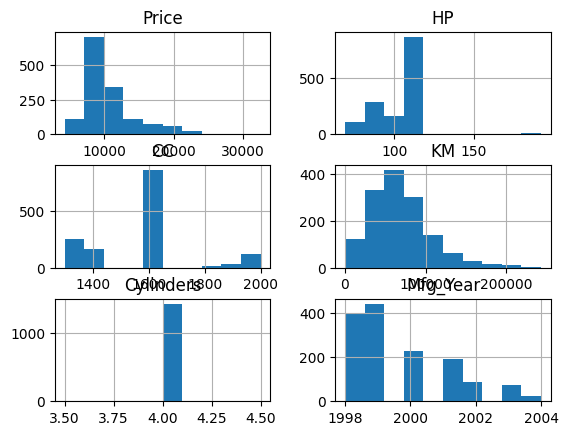

In [4]:
plt.figure(figsize=(10,8))
cdf=df[['Price','HP','CC','KM','Cylinders', 'Model','Mfg_Year']]
cdf.hist()

In [5]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

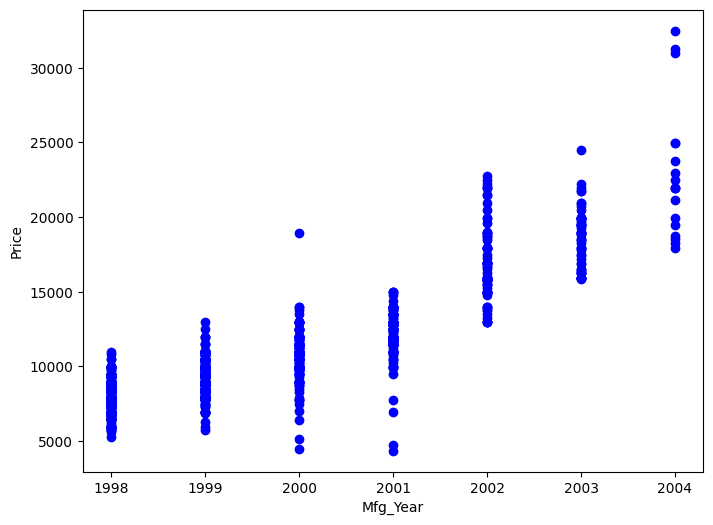

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(train.Mfg_Year, train.Price,color='blue')
plt.xlabel("Mfg_Year")
plt.ylabel("Price")
plt.show()

In [7]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Mfg_Year']])
y = np.asanyarray(train[['Price']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[2079.60270757]]


array([[<Axes: title={'center': 'Mfg_Year'}>]], dtype=object)

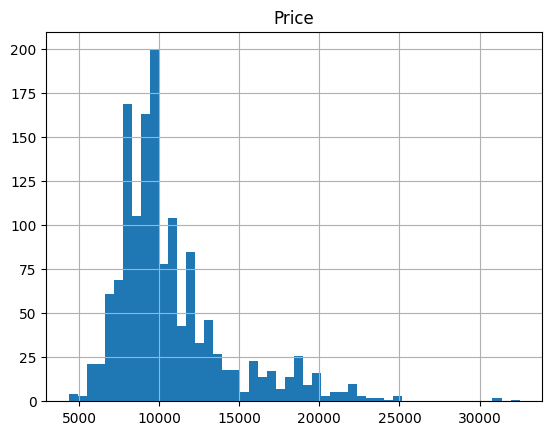

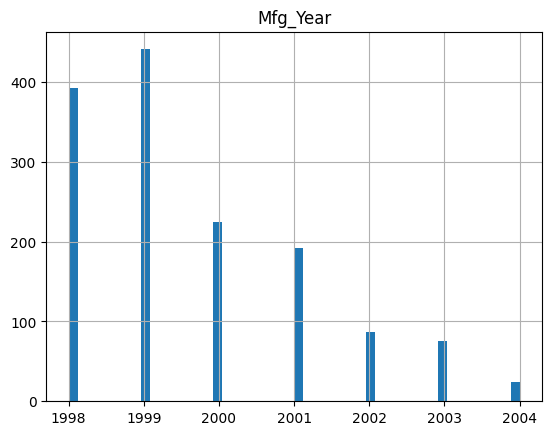

In [8]:
df.hist(column='Price', bins=50)
df.hist(column='Mfg_Year', bins=50)

In [10]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')

In [ ]:
X = df[['Mfg_Year']] .values  #.astype(float)
X[0:5]

array([[2002],
       [2002],
       [2002],
       [2002],
       [2002]], dtype=int64)

In [ ]:
y = df['Price'].values
y[0:5]

array([13500, 13750, 13950, 14950, 13750], dtype=int64)

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[1.54179615],
       [1.54179615],
       [1.54179615],
       [1.54179615],
       [1.54179615]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1005, 1) (1005,)
Test set: (431, 1) (431,)


In [ ]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

In [ ]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([ 7250, 10250,  8750, 10250,  8750], dtype=int64)

In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.03781094527363184
Test set Accuracy:  0.027842227378190254


In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.02320186, 0.02320186, 0.02088167, 0.02784223, 0.01856148,
       0.00928074, 0.0162413 , 0.02552204, 0.02552204])

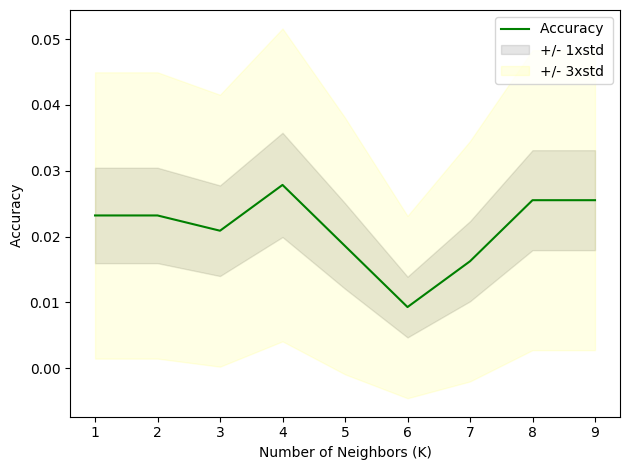

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10,color="black")
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="yellow")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()


In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.027842227378190254 with k= 4


In [ ]:
y_hat= regr.predict(test[['Mfg_Year']])
x = np.asanyarray(test[['Mfg_Year']])
y = np.asanyarray(test[['Price']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))


print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 2754189.94
Variance score: 0.79


c:\Users\Technomowj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import r2_score

print("Residual sum of squares (MSE): %.2f" % np.mean((y - y_hat) ** 2))
print("R2-score: %.2f" % r2_score(y,y_hat ))

Residual sum of squares (MSE): 2754189.94
R2-score: 0.79
